In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
from beliefPropagation import performBeliefPropagation

In [3]:
code = "[[72, 12, 6]]"

matrix = np.load(f"codes/{code}.npz")
n = 72
k = 12

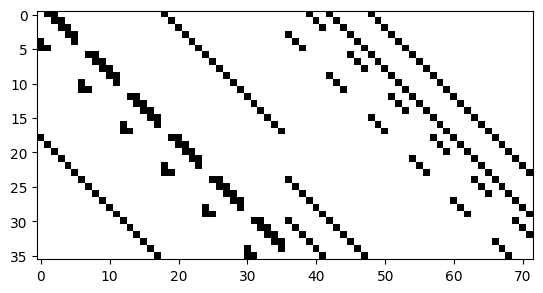

In [4]:
Hx = matrix["Hx"]
plt.imshow(Hx, cmap='Greys', interpolation='nearest')

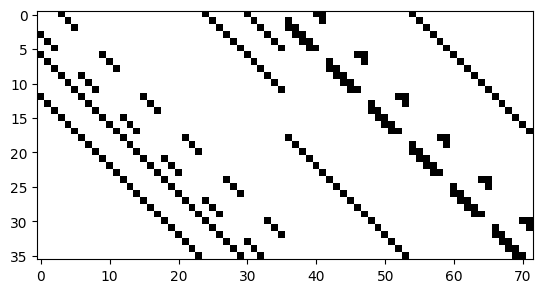

In [5]:
Hz = matrix['Hz']
plt.imshow(Hz, cmap="Greys", interpolation="nearest")

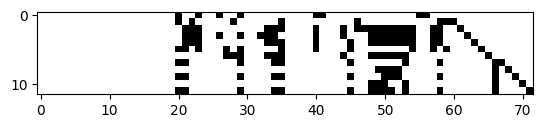

In [6]:
Lx = matrix['Lx']
plt.imshow(Lx, cmap="Greys", interpolation="nearest")

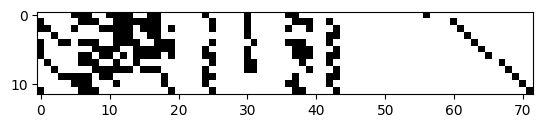

In [7]:
Lz = matrix['Lz']
plt.imshow(Lz, cmap="Greys", interpolation="nearest")

In [8]:
print(Hx.shape)
print(Lx.shape)

(36, 72)
(12, 72)


In [9]:
# logical operator anticommute
# np.sum((Hz @ Lx.T) % 2 )

In [10]:
# np.sum((Hx @ Lz.T) % 2)

In [11]:
errorRate = 0.05

In [12]:
# set numpy random seed
np.random.seed(0)

In [13]:
error = (np.random.rand(n) < errorRate).astype(int)
print(error)

# trivial error
# error = Hz[0].copy()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [14]:
# e_actual != e_decoded
# but
# e_actual + e_decoded \in S

e_simple = np.zeros(n, dtype=int)
e_simple[0] = 1

stabilizer = Hz[0].copy()
e_actual = (e_simple + stabilizer) % 2
error = e_actual.copy()

In [ ]:
# non-trivial error

# e_simple = np.zeros(n, dtype=int)
# e_simple[0] = 1

# logical_op = Lz[0].copy()
# e_actual = (e_simple + logical_op) % 2
# error = e_actual.copy()

In [16]:
print(error.reshape(1, -1)) # this is just for plt, since it wants a matrix

[[1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
  1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


([], [])

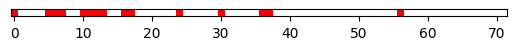

In [17]:
cmap = ListedColormap(['white', 'red'])
plt.imshow(error.reshape(1, -1), cmap=cmap, interpolation="nearest")
plt.yticks([])

In [18]:
initialBeliefs = [np.log((1 - errorRate) / errorRate)] * n
print(initialBeliefs)

[np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.float64(2.9444389791664403), np.floa

([], [])

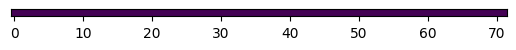

In [19]:
plt.imshow(np.asarray(initialBeliefs).reshape(1, -1), interpolation='nearest')
plt.yticks([])

In [20]:
detection, isSyndromeFound, lastBeliefs = performBeliefPropagation(Hx, error, initialBeliefs)

Initial syndrome: [1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [21]:
print(detection, isSyndromeFound)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0] False


([], [])

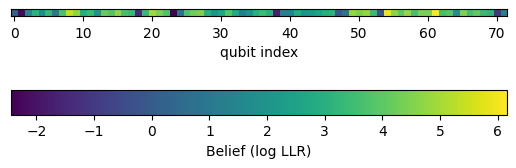

In [22]:
im = plt.imshow(np.asarray(lastBeliefs).reshape(1, -1), interpolation='nearest')
cbar = plt.colorbar(im, orientation='horizontal', pad=0.2)
cbar.set_label('Belief (log LLR)')
plt.xlabel('qubit index')
plt.yticks([])

In [23]:
residual = (detection + error) % 2
print(residual)

[1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


Text(0.5, 0, 'qubit index')

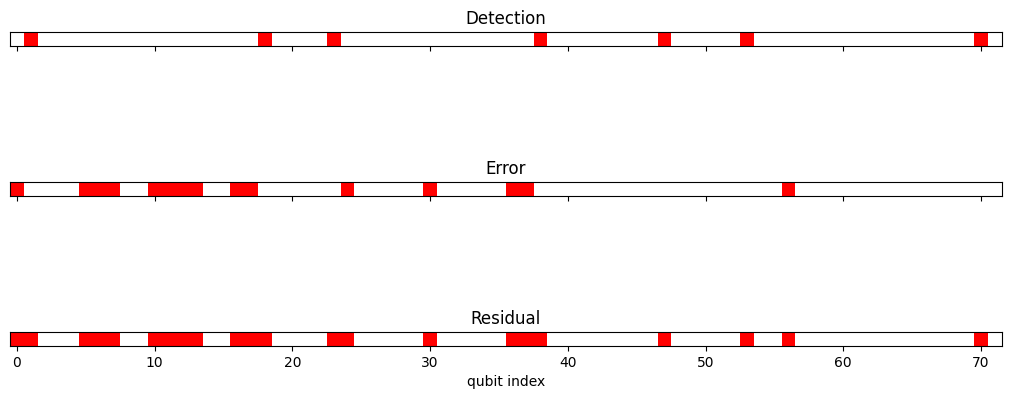

In [24]:
fig, axs = plt.subplots(3, 1, figsize=(10, 4.5), sharex=True, constrained_layout=True)

axs[0].imshow(detection.reshape(1, -1), cmap=cmap, interpolation="nearest")
axs[0].set_yticks([])
axs[0].set_title("Detection")

axs[1].imshow(error.reshape(1, -1), cmap=cmap, interpolation="nearest")
axs[1].set_yticks([])
axs[1].set_title("Error")

axs[2].imshow(residual.reshape(1, -1), cmap=cmap, interpolation="nearest")
axs[2].set_yticks([])
axs[2].set_title("Residual")
axs[2].set_xlabel("qubit index")

In [25]:
# Lx is a 12 x 72 matrix, and residual is a 1 x 72 vector
print(Lx.shape, residual.shape)
syndromeLogicError = (Lx @ residual) % 2 # we do not need the transpose since @ does the broadcasting. I think is considered as a trivial case
print(syndromeLogicError)

(12, 72) (72,)
[0 0 1 0 0 1 1 1 0 0 0 1]


([], [])

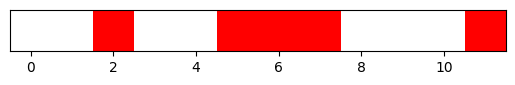

In [26]:
plt.imshow(syndromeLogicError.reshape(1, -1), cmap=cmap, interpolation="nearest")
plt.yticks([])